,X1,X2,X3,X4
0,0.496714,-1.415371,0.357787,A
1,-0.138264,-0.420645,0.560785,B
2,0.647689,-0.342715,1.083051,A
3,1.523030,-0.802277,1.053802,A
4,-0.234153,-0.161286,-1.377669,C
...,...,...,...,...
95,-1.463515,0.385317,-0.692910,C
96,0.296120,-0.883857,0.899600,C
97,0.261055,0.153725,0.307300,A
98,0.005113,0.058209,0.812862,B


Index(['X1', 'X2', 'X3', 'X4_B', 'X4_C'], dtype='object')

array([ 1.06560316,  1.98063805,  3.09797452,  0.05464034, -0.15141904])

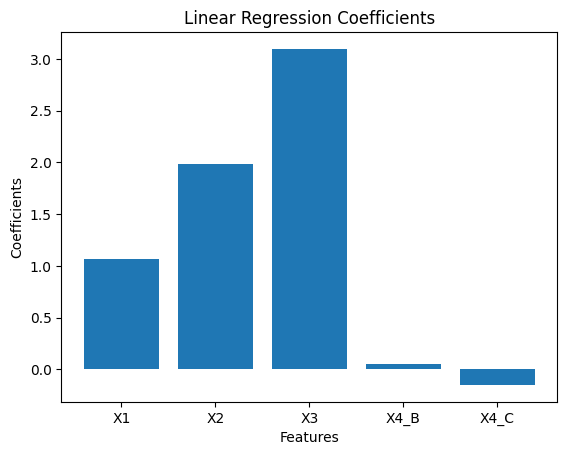

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder

# Set seed for reproducibility
np.random.seed(42)

# Generate data
size = 100
mean = 0
std_dev = 1

# Three variables from normal distribution
var1 = np.random.normal(mean, std_dev, size)
var2 = np.random.normal(mean, std_dev, size)
var3 = np.random.normal(mean, std_dev, size)

# Categorical feature with three values
categories = np.random.choice(['A', 'B', 'C'], size=size)

# Create a DataFrame
data = pd.DataFrame({'X1': var1, 'X2': var2, 'X3': var3, 'X4': categories})

# Target variable
target = 1 * var1 + 2 * var2 + 3 * var3 + np.random.normal(0, 0.5, size)

# Add target variable to the DataFrame
data['Target'] = target

# Fit linear regression model
X = data.drop('Target', axis=1)
y = data['Target']
categorical_cols = ["X4"]
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='error',drop='first'))])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", 'passthrough', ["X1","X2","X3"]),
        ('cat', categorical_transformer, categorical_cols)
    ]
)
linear_regression_model = make_pipeline(
    preprocessor,
    LinearRegression()
)
linear_regression_model.fit(X, y)
# Plot coefficients
x = data.drop('Target', axis=1)
enc = pd.get_dummies(x, drop_first=True)
features = enc.columns
linrea_regression = linear_regression_model.named_steps['linearregression']
coefs = linrea_regression.coef_
display(features)
display(coefs)

plt.bar(features, coefs)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Linear Regression Coefficients')
plt.show()


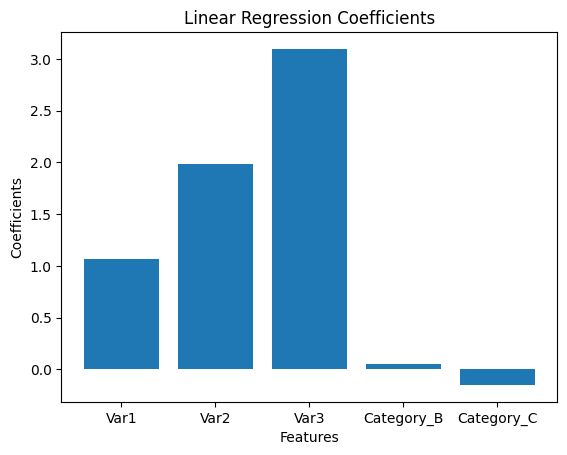

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Set seed for reproducibility
np.random.seed(42)

# Generate data
size = 100
mean = 0
std_dev = 1

# Three variables from normal distribution
var1 = np.random.normal(mean, std_dev, size)
var2 = np.random.normal(mean, std_dev, size)
var3 = np.random.normal(mean, std_dev, size)

# Categorical feature with three values
categories = np.random.choice(['A', 'B', 'C'], size=size)

# Create a DataFrame
data = pd.DataFrame({'Var1': var1, 'Var2': var2, 'Var3': var3, 'Category': categories})

# Encode categorical feature
data = pd.get_dummies(data, columns=['Category'], drop_first=True)

# Target variable
target = 1 * var1 + 2 * var2 + 3 * var3 + np.random.normal(0, 0.5, size)

# Add target variable to the DataFrame
data['Target'] = target

# Fit linear regression model
X = data.drop('Target', axis=1)
y = data['Target']

model = LinearRegression()
model.fit(X, y)

# Plot coefficients
coefs = model.coef_
features = X.columns

plt.bar(features, coefs)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Linear Regression Coefficients')
plt.show()


In [29]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor


def plot_feature_importance_comparison(models, X_test, y_test, linear_reg=None, colors=None):
    # Dictionary to store feature importance results
    fi_results = {}

    for model_name, model in models.items():
        fi = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)
        fi_results[model_name] = fi.importances_mean

    if linear_reg is not None:
        fi_results['Linear Regression'] = np.abs(linear_reg.coef_)

    # Extract feature names
    feature_names = list(X_test.columns)

    # Create a DataFrame for feature importance results
    importance_df = pd.DataFrame(fi_results, index=feature_names)

    # Plot grouped bar chart
    fig, ax = plt.subplots(figsize=(10, 6))

    bar_width = 0.1
    bar_positions = np.arange(len(feature_names))

    for i, (model, importance) in enumerate(importance_df.items()):
        color = colors[i] if colors is not None else None
        ax.bar(bar_positions + (i * bar_width), importance, width=bar_width, label=model, color=color)

    # Add labels, title, and legend
    ax.set_xticks(bar_positions + 1.5 * bar_width)
    ax.set_xticklabels(feature_names, rotation=45, ha='right')
    ax.set_xlabel('Features')
    ax.set_ylabel('Importance')
    ax.set_title('Feature Importance Comparison')
    ax.legend()

    plt.tight_layout()
    plt.show()
    
models = {

}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_regression_model = linrea_regression  # Replace with your linear regression model if available
# Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Support Vector Machine Regression
svm_reg = SVR(kernel='linear')
svm_reg.fit(X_train, y_train)

# XGBoost Regression
xgb_reg = XGBRegressor(random_state=42)
xgb_reg.fit(X_train, y_train)

# Multi-layer Perceptron Regression
mlp_reg = MLPRegressor(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
mlp_reg.fit(X_train, y_train)

# Example usage with custom colors
models = {
    'Random Forest': rf_reg,
    'SVR': svm_reg,
    'XGBoost': xgb_reg,
    'MLP': mlp_reg
}
# Specify custom colors for each model
custom_colors = ['blue', 'green', 'red', 'purple','black']

plot_feature_importance_comparison(models, X_test, y_test, linear_reg=linear_regression_model, colors=custom_colors)

ValueError: could not convert string to float: 'B'

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
def plot():
    fig,(ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(15, 5))  # (rows, columns, index)
    lr_disp = PartialDependenceDisplay.from_estimator(linear_regression_model, X_train, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"])
    xgb_disp = PartialDependenceDisplay.from_estimator(xgb_reg, X_train, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"])
    rf_disp = PartialDependenceDisplay.from_estimator(rf_reg, X_train, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"])
    mlrp_disp = PartialDependenceDisplay.from_estimator(mlp_reg, X_train, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"])
    svm_disp = PartialDependenceDisplay.from_estimator(svm_reg, X_train, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"])
    x_vals = np.linspace(-2, 2, 1000)
    ax1.plot(x_vals, x_vals, label='true effect', color='black',linestyle='dashed')
    ax2.plot(x_vals, x_vals, label='true effect', color='black',linestyle='dashed')
    ax3.plot(x_vals, x_vals, label='true effect', color='black',linestyle='dashed')
    lr_disp.plot(ax=[ax1, ax2,ax3,ax4], line_kw={"label": "LR","color":'green'})
    xgb_disp.plot(ax=[ax1, ax2,ax3,ax4], line_kw={"label": "xgboost","color":'red'})
    rf_disp.plot(ax=[ax1, ax2,ax3,ax4], line_kw={"label": "random forest","color":'blue'})
    mlrp_disp.plot(ax=[ax1, ax2,ax3,ax4], line_kw={"label": "NN","color":'grey'})
    svm_disp.plot(ax=[ax1, ax2,ax3,ax4], line_kw={"label": "SVM","color":'orange'})
    ax1.set_ylim(-2, 2) 
    ax2.set_ylim(-2, 2) 
    ax3.set_ylim(-2, 2) 
    ax4.set_ylim(-2, 2) 
    ax1.legend(ncols=6)
    ax2.get_legend().remove()
    ax3.get_legend().remove()
    ax4.get_legend().remove()
    for ax in [ax1, ax2, ax3, ax4]:
        ax.set_ylim(-4, 4)
        ax.set_ylabel('')  
    for ax in [ax2, ax3, ax4]:
        ax.set_yticks([])
    def legend_without_duplicate_labels(ax):
        handles, labels = ax.get_legend_handles_labels()
        unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
        return unique

    lines_labels = legend_without_duplicate_labels(ax1)
    lines, labels = zip(*lines_labels)
    lines = list(lines)
    labels = list(labels)

    # fig.legend(lines, labels,fontsize='small')

    plt.show()
plot()


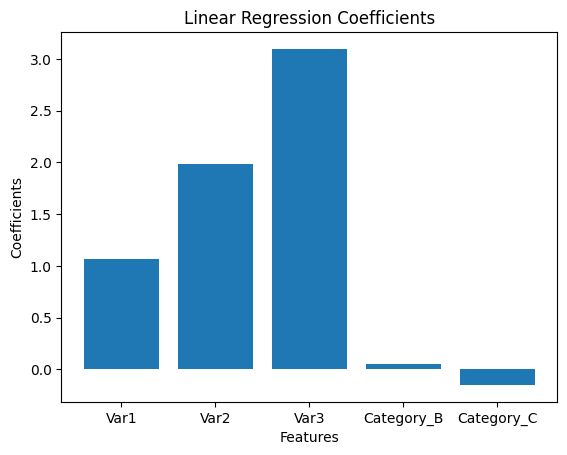

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Set seed for reproducibility
np.random.seed(42)

# Generate data
size = 100
mean = 0
std_dev = 1

# Three variables from normal distribution
var1 = np.random.normal(mean, std_dev, size)
var2 = np.random.normal(mean, std_dev, size)
var3 = np.random.normal(mean, std_dev, size)

# Categorical feature with three values
categories = np.random.choice(['A', 'B', 'C'], size=size)

# Create a DataFrame
data = pd.DataFrame({'Var1': var1, 'Var2': var2, 'Var3': var3, 'Category': categories})

# Encode categorical feature
data = pd.get_dummies(data, columns=['Category'], drop_first=True)

# Target variable
target = 1 * var1 + 2 * var2 + 3 * var3 + np.random.normal(0, 0.5, size)

# Add target variable to the DataFrame
data['Target'] = target

# Fit linear regression model
X = data.drop('Target', axis=1)
y = data['Target']

model = LinearRegression()
model.fit(X, y)

# Plot coefficients
coefs = model.coef_
features = X.columns

plt.bar(features, coefs)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Linear Regression Coefficients')
plt.show()
